# Sistemas Inteligentes para Bioinformática

Exemplos de validação de código. Deverá corrigir os imports e diretórios de acordo com a sua implementação.

In [1]:
import os
from si.data.Dataset import Dataset
from si.util.Util import summary

In [2]:
DIR = os.path.dirname(os.path.realpath('.'))
filename = os.path.join(DIR, 'datasets\\breast-bin.data')

## Labeled dataset

In [3]:
dataset = Dataset.from_data(filename, labeled = True)

In [4]:
dataset.X[:5, :]

array([[8., 4., 4., 1., 2., 9., 3., 3., 1.],
       [5., 1., 1., 3., 2., 1., 1., 1., 1.],
       [2., 1., 1., 1., 3., 1., 2., 1., 1.],
       [2., 1., 1., 1., 2., 1., 3., 1., 1.],
       [9., 5., 8., 1., 2., 3., 2., 1., 5.]])

In [5]:
dataset.y[:5]

array([1., 0., 0., 0., 1.])

In [6]:
print("Has label:", dataset.hasLabel())
print("Number of features:", dataset.getNumFeatures())
print("Number of classes:", dataset.getNumClasses())
summary(dataset)

Has label: True
Number of features: 9
Number of classes: 2


,A,B,C,D,E,F,G,H,I,y
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,0.344778
var,7.917053,9.298082,8.819630,8.141527,4.896110,13.099601,5.937114,9.311340,2.937284,0.225906
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [7]:
dataset.toDataFrame()

,A,B,C,D,E,F,G,H,I,y
0,8.0,4.0,4.0,1.0,2.0,9.0,3.0,3.0,1.0,1.0
1,5.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
2,2.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,0.0
3,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
4,9.0,5.0,8.0,1.0,2.0,3.0,2.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...
694,1.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,1.0,0.0
695,5.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0
696,5.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
697,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,0.0


## Standard Scaler

In [8]:
from si.util.Scale import StandardScaler

In [9]:
sc = StandardScaler()
ds2 = sc.fit_transform(dataset)
summary(ds2)

,A,B,C,D,E,F,G,H,I,y
mean,-5.034917e-17,2.361805e-16,1.224581e-16,2.816059e-16,2.681054e-16,-6.480272e-16,4.034287e-17,-2.642934e-16,-7.290306e-17,0.344778
var,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.225906
max,1.983939e+00,2.251526e+00,2.287222e+00,2.520955e+00,3.065906e+00,1.799664e+00,2.693171e+00,2.337594e+00,4.907421e+00,1.000000
min,-1.214667e+00,-6.999951e-01,-7.432990e-01,-6.332472e-01,-1.001495e+00,-6.869792e-01,-1.000471e+00,-6.118250e-01,-3.439118e-01,0.000000


# Feature Selection

In [10]:
from si.data.Feature_selection import f_regression, SelectKBest, VarianceThreshold

## Variance Threshold

In [11]:
vt = VarianceThreshold(8)
ds2 = vt.fit_transform(dataset)
summary(ds2)

,B,C,D,F,H,y
mean,3.134478,3.207439,2.806867,3.486409,2.866953,0.344778
var,9.298082,8.819630,8.141527,13.099601,9.311340,0.225906
max,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


## SelectKBest

In [12]:
# SelectKBest for classification
skb = SelectKBest(5)
ds3 = skb.fit_transform(dataset)
summary(ds3)


,A,G,B,C,F,y
mean,4.417740,3.437768,3.134478,3.207439,3.486409,0.344778
var,7.917053,5.937114,9.298082,8.819630,13.099601,0.225906
max,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


# Clustering

In [13]:
from si.unsupervised.Kmeans import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# o dataset iris nao estava inicialmente no github
filename = os.path.join(DIR, 'datasets/iris.data')
df = pd.read_csv(filename)
iris = Dataset.from_dataframe(df, ylabel = "class")

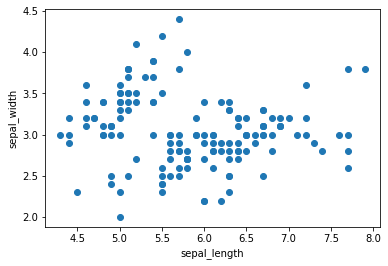

In [15]:
# indice das features para o plot
c1 = 0
c2 = 1
# plot
plt.scatter(iris.X[:,c1], iris.X[:,c2])
plt.xlabel(iris.xnames[c1])
plt.ylabel(iris.xnames[c2])
plt.show()

In [16]:
kmeans = KMeans(3)
cent, clust = kmeans.fit_transform(iris)

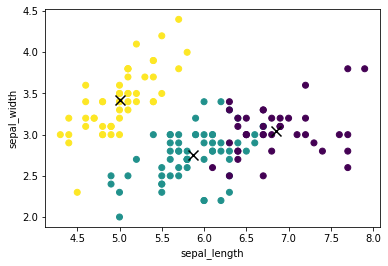

In [17]:
plt.scatter(iris.X[:,c1], iris.X[:,c2], c = clust)
plt.scatter(cent[:,c1],cent[:,c2], s = 100, c = 'black', marker = 'x')
plt.xlabel(iris.xnames[c1])
plt.ylabel(iris.xnames[c2])
plt.show()

# PCA

In [18]:
from si.unsupervised import PCA

In [19]:
pca = PCA(2, scale = True)

In [20]:
reduced = pca.fit_transform(iris)
print(pca.variance_explained())

[[-9.00681170e-01 -1.14301691e+00 -1.38535265e+00 -1.50652052e+00
  -1.02184904e+00 -5.37177559e-01 -1.50652052e+00 -1.02184904e+00
  -1.74885626e+00 -1.14301691e+00 -5.37177559e-01 -1.26418478e+00
  -1.26418478e+00 -1.87002413e+00 -5.25060772e-02 -1.73673948e-01
  -5.37177559e-01 -9.00681170e-01 -1.73673948e-01 -9.00681170e-01
  -5.37177559e-01 -9.00681170e-01 -1.50652052e+00 -9.00681170e-01
  -1.26418478e+00 -1.02184904e+00 -1.02184904e+00 -7.79513300e-01
  -7.79513300e-01 -1.38535265e+00 -1.26418478e+00 -5.37177559e-01
  -7.79513300e-01 -4.16009689e-01 -1.14301691e+00 -1.02184904e+00
  -4.16009689e-01 -1.14301691e+00 -1.74885626e+00 -9.00681170e-01
  -1.02184904e+00 -1.62768839e+00 -1.74885626e+00 -1.02184904e+00
  -9.00681170e-01 -1.26418478e+00 -9.00681170e-01 -1.50652052e+00
  -6.58345429e-01 -1.02184904e+00  1.40150837e+00  6.74501145e-01
   1.28034050e+00 -4.16009689e-01  7.95669016e-01 -1.73673948e-01
   5.53333275e-01 -1.14301691e+00  9.16836886e-01 -7.79513300e-01
  -1.02184

In [21]:
iris_pca = Dataset(reduced[0], iris.y, xnames = ['pc1', 'pc2'], yname = 'class')
iris_pca.toDataFrame()

,pc1,pc2,class
0,2.264542,-0.505704,Iris-setosa
1,2.086426,0.655405,Iris-setosa
2,2.36795,0.318477,Iris-setosa
3,2.304197,0.575368,Iris-setosa
4,2.388777,-0.674767,Iris-setosa
...,...,...,...
145,-1.870522,-0.382822,Iris-virginica
146,-1.558492,0.905314,Iris-virginica
147,-1.520845,-0.266795,Iris-virginica
148,-1.376391,-1.016362,Iris-virginica


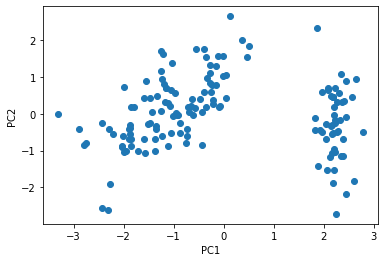

In [22]:
plt.scatter(iris_pca.X[:,0], iris_pca.X[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# KNN

In [23]:
from si.supervised.KNN import KNN
# from src.si.util.util import train_test_split

In [24]:
knn = KNN(3)

In [25]:
knn.fit(iris)

In [26]:
# the index of a dataset entry
id = 50

# prediction
x = iris.X[id, :]

pred = knn.predict(x)

print(f'Prediction: {pred}')
print(f'True: {iris.y[id]}')

Prediction: Iris-versicolor
True: Iris-versicolor


In [27]:
print(knn.cost())

0.96


In [28]:
from si.util import train_test_split

In [29]:
train, test = train_test_split(dataset)
print(train.X.shape)
print(test.X.shape)

(559, 9)
(140, 9)


In [30]:
summary(train)

,A,B,C,D,E,F,G,H,I,y
mean,4.429338,3.164580,3.216458,2.826476,3.221825,3.504472,3.486583,2.914132,1.531306,0.347048
var,7.804935,9.325329,8.781411,8.307993,4.777270,13.162323,5.970750,9.484577,2.445800,0.226606
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [31]:
summary(test)

,A,B,C,D,E,F,G,H,I,y
mean,4.371429,3.014286,3.171429,2.728571,3.192857,3.414286,3.242857,2.678571,1.821429,0.335714
var,8.362041,9.171224,8.970612,7.469184,5.369949,12.842653,5.755306,8.575255,4.832398,0.223010
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [32]:
knn = KNN(3)
knn.fit(train)
knn.cost()

0.9767441860465116